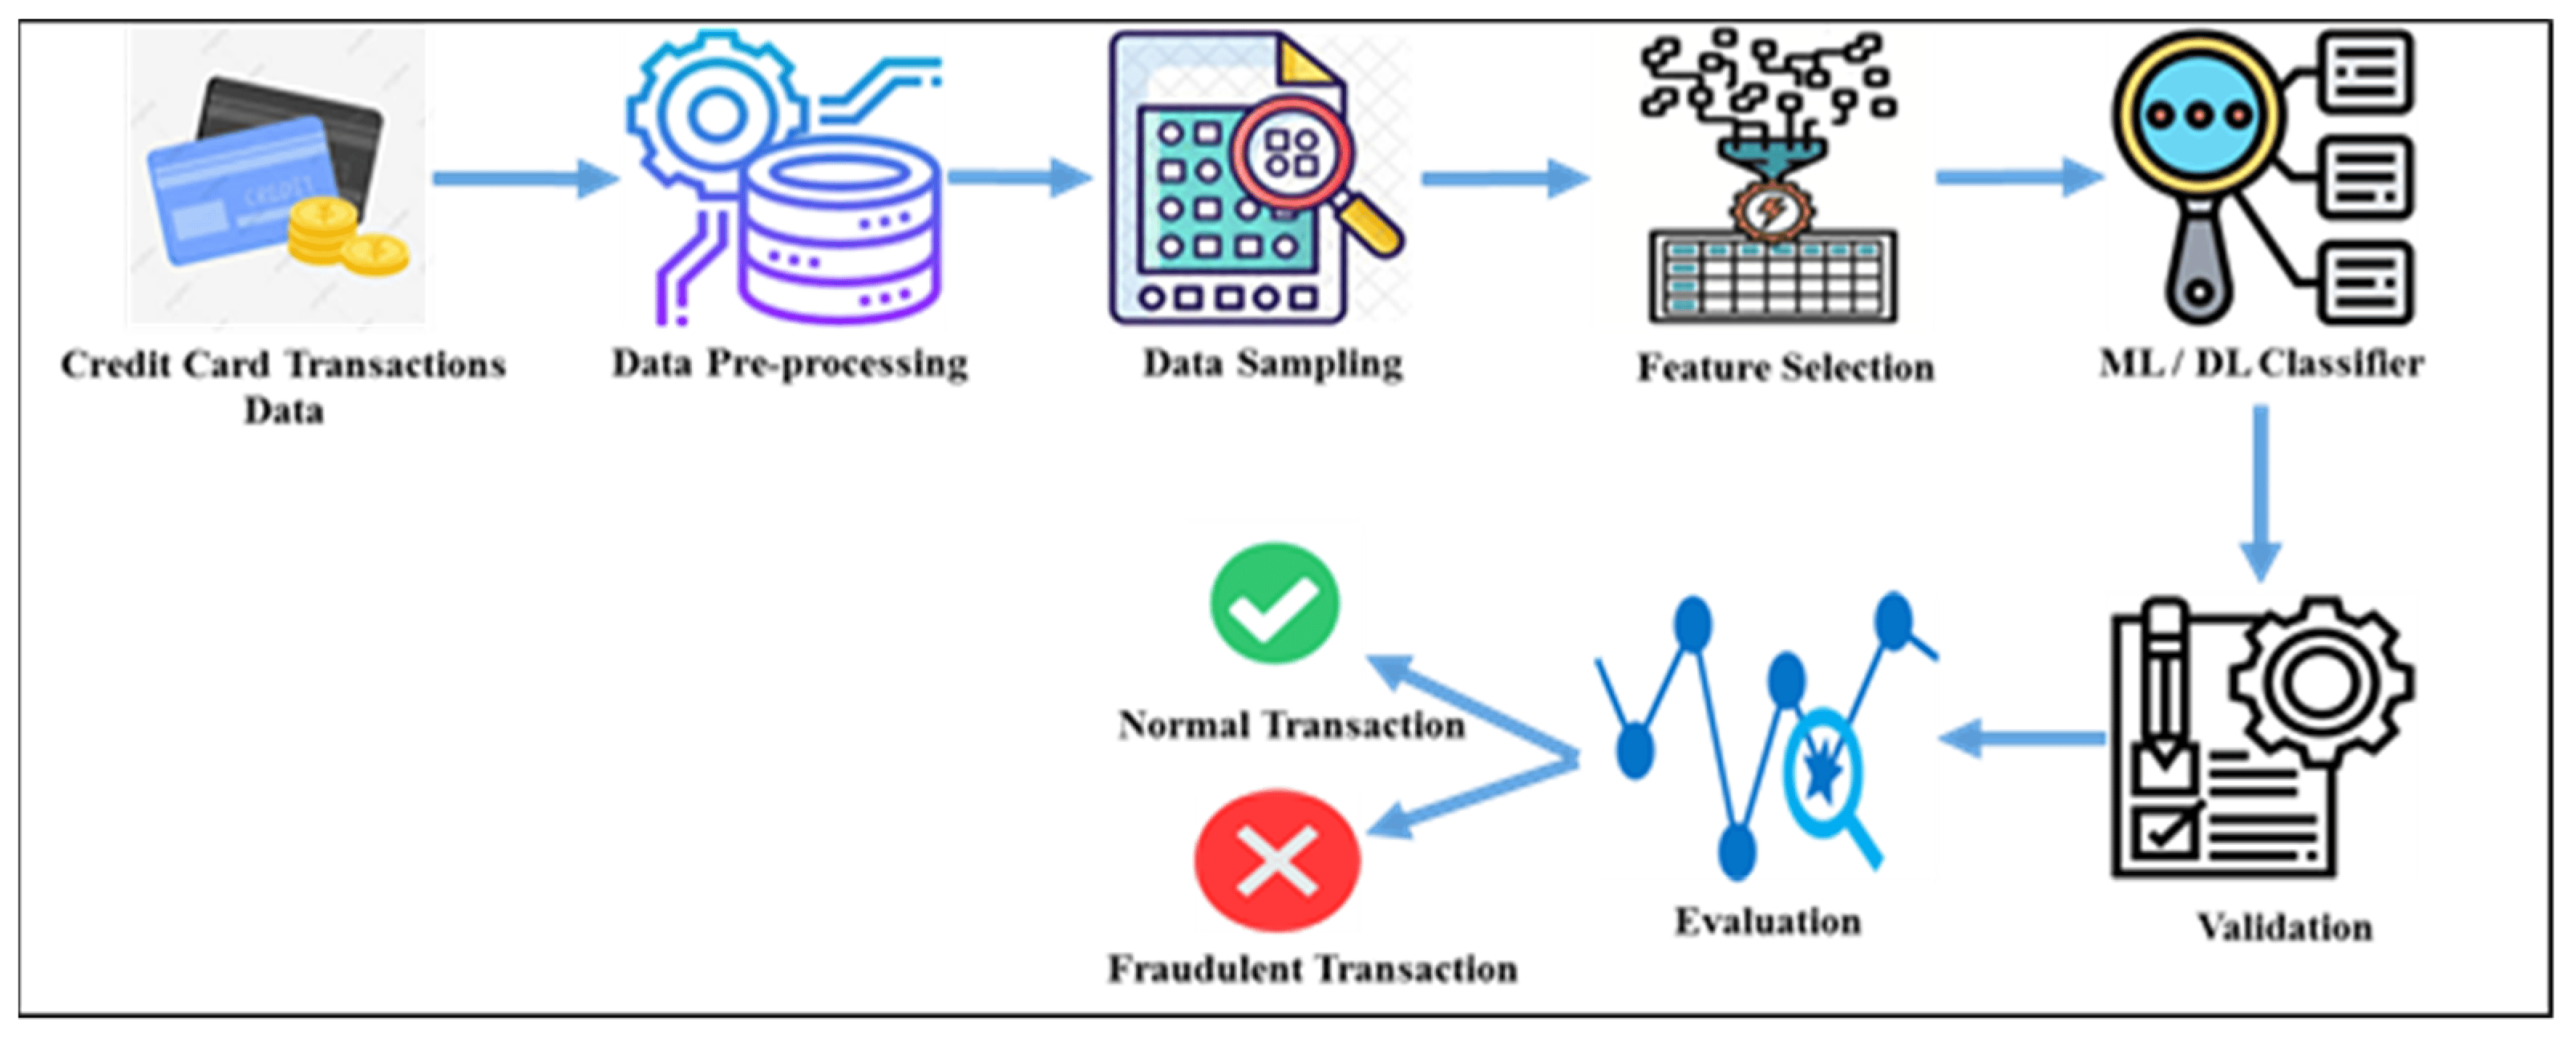

# Problem statement:


*   Credit card fraud detection is an immenent problem to every company in the banking industry. Detecting and preventing credit card fraud is a necessity for banks.
*   Hence, our objective here is to develop a machine learning model that detects fraudulent transactions based on the historical transactional data of customers with a pool of merchants and provide a cost benefit analysis of the model to the stakeholders and provide them with appropriate recommendations to adopt in order to mitigate fraud risks.



# Importing libraries

In [94]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']= [10,5]

In [95]:
train = pd.read_csv('/content/fraudTrain.csv')
test = pd.read_csv('/content/fraudTest.csv')

In [96]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [97]:
train.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


### Data Dictionary

* **trans_date_trans_time** -> Transaction time stamp
* **cc_num** -> Credit card number
* **merchant** -> merchant name
* **category** -> transaction category
* **amt** -> Transaction amount
* **first** -> First name of card holder
* **last** -> Last name of card holder
* **gender** -> Sex of card holder
* **street** -> transaction address
* **city** -> transaction city
* **state** -> transaction state
* **zip** -> transaction zipcode
* **lat** -> transaction lattitude
* **long** -> transaction longitude
* **city_pop** -> Population of the city
* **job** -> job of the card holder
* **dob** -> date of birth of card holder
* **trans_num** -> transaction number of transaction
* **unix_time** -> time in unix format
* **merch_lat** -> lattitude of the merchant
* **merch_long** -> longitude of merchant
* **is_fraud** -> nature of transaction (fraud or not fraud)


* **Here, the 'is_fraud' variables is our target variable.**

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [99]:
# Checking for null values
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [101]:
#test data_Set
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [102]:
train.shape

(1296675, 23)

In [103]:
test.shape

(555719, 23)

In [104]:
data = pd.concat([train, test], axis = 0)
data.shape

(1852394, 23)

In [105]:
# Checking for duplicate values
data.duplicated().sum()

0

In [106]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [107]:
data['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [108]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [110]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


# Data Visualization

<Axes: xlabel='is_fraud', ylabel='count'>

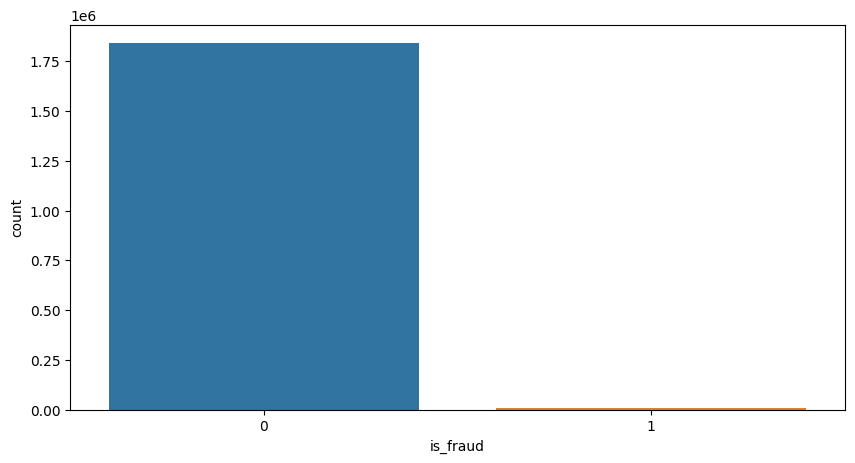

In [111]:
sns.countplot(x = data['is_fraud'])

<Axes: xlabel='gender', ylabel='count'>

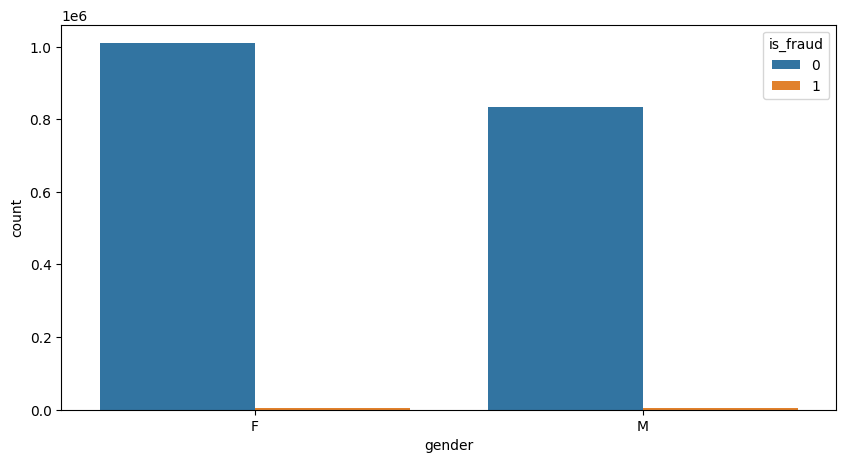

In [112]:
sns.countplot(x = 'gender', hue = 'is_fraud', data = data)

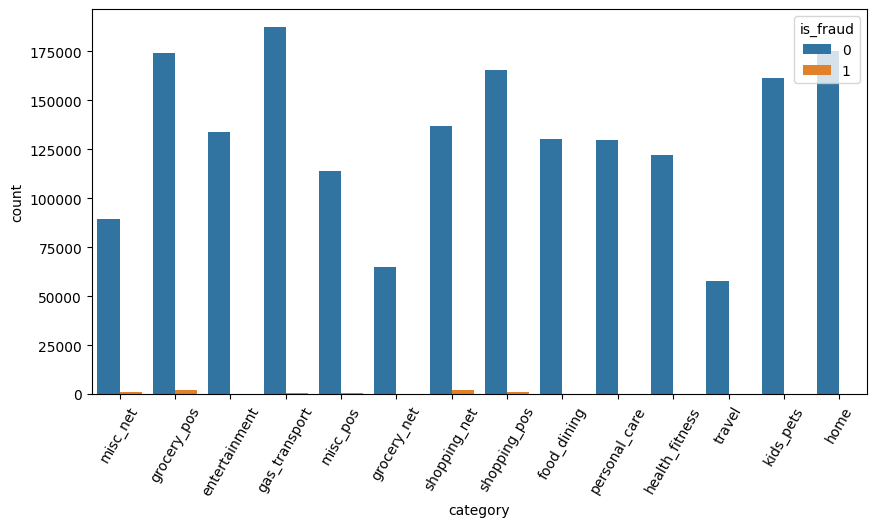

In [113]:
sns.countplot(x = 'category', hue = 'is_fraud', data = data)
plt.xticks(rotation = 60)
plt.show()

<Axes: >

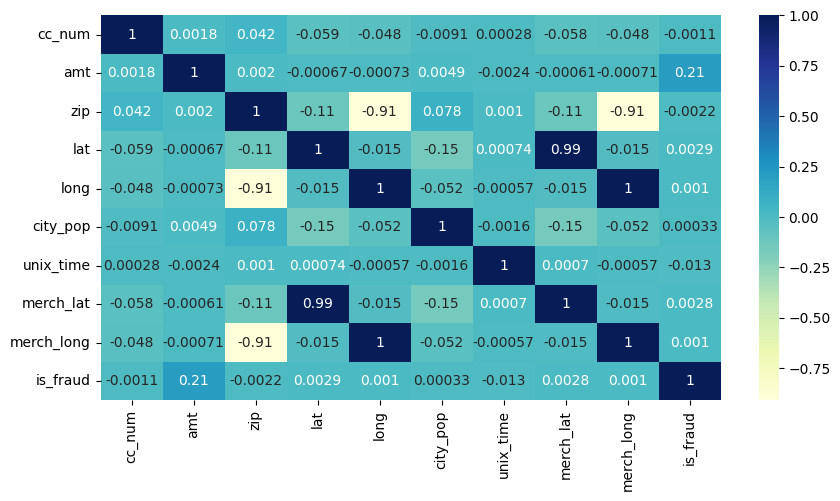

In [114]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

# Model Evaluation

In [115]:
X = data.drop(['is_fraud'], axis = 1)
Y = data['is_fraud']

In [116]:
# Encoding the categorical columns
from sklearn.preprocessing import OrdinalEncoder
cols = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
        'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
encoder = OrdinalEncoder()
X[cols] = encoder.fit_transform(X[cols])

In [117]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [118]:
Y = data[['is_fraud']].values

# With Under Sampling
* In undersampling, the number of samples taken from majority class will be equal to total number of samples of minority class

In [119]:
from imblearn.under_sampling import NearMiss
nm_sampler = NearMiss()
x_sampled, y_sampled = nm_sampler.fit_resample(X, Y)

print('Data   : ', x_sampled.shape)
print('Labels : ', y_sampled.shape)

Data   :  (19302, 21)
Labels :  (19302,)


In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.2, random_state = 42)

# Logistic Regression

In [121]:
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)

LogisticRegression()

In [123]:
y_pred= lr_classifier.predict(x_test)

accuracy = round(accuracy_score(y_test, y_pred)*100,2)

print('Accuracy of the Logistic Regression model is: ',accuracy)

Accuracy of the Logistic Regression model is:  79.98


# Decision Tree

In [124]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [125]:
y_pred= decisionTree.predict(x_test)

accuracy = round(accuracy_score(y_test, y_pred)*100,2)

print('Accuracy of the  Decision Tree model is: ',accuracy)

Accuracy of the  Decision Tree model is:  94.87


# Random Forest

In [126]:
randomForest= RandomForestClassifier()
randomForest.fit(x_train, y_train)

RandomForestClassifier()

In [127]:
y_pred= randomForest.predict(x_test)

accuracy = round(accuracy_score(y_test, y_pred)*100,2)

print('Accuracy of the Random Forest model is: ',accuracy)

Accuracy of the Random Forest model is:  94.98
